In [1]:
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.models.unet import mobilenet_unet
from keras_segmentation.models.unet import unet_mini
from keras_segmentation.models.unet import mobilenet_unet
from keras_segmentation.models.segnet import mobilenet_segnet
from keras_segmentation.models.segnet import segnet
from keras_segmentation.models.segnet import vgg_segnet
from keras_segmentation.models.fcn import fcn_32_mobilenet


Using TensorFlow backend.


In [2]:


model = mobilenet_segnet(n_classes=6 ,  input_height=128, input_width=128, encoder_level=2 )
# model = vgg_segnet(n_classes=5 ,  input_height=128, input_width=128  )



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 130, 130, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 24)        648       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 24)        96        
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 24)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 66, 66, 24)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 24)        216 

In [4]:
model.train(
    train_images =  "dataset_p9AL/images_prepped_train1000\\",
    train_annotations = "dataset_p9AL/annotations_prepped_train1000\\",
    checkpoints_path = "output2/mobilenetV1_75_segnet_tongtest" , epochs=100,
    validate=True,
    val_images="dataset_p9AL/images_prepped_test1000\\",
    val_annotations="dataset_p9AL/annotations_prepped_test1000\\",
#     auto_resume_checkpoint=True,
    
)


  4%|▍         | 50/1207 [00:00<00:02, 491.51it/s]

Verifying train dataset


 18%|█▊        | 50/281 [00:00<00:00, 496.55it/s]

Dataset verified! 
Verifying val dataset


100%|██████████| 281/281 [00:00<00:00, 476.36it/s]

Dataset verified! 
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100
512/512 [==============================] - 47s 92ms/step - loss: 0.2284 - accuracy: 0.9266 - val_loss: 0.1030 - val_accuracy: 0.9572

Epoch 00001: val_loss improved from inf to 0.10298, saving model to output2/mobilenetV1_75_segnet_tongtest.01
Epoch 2/100
512/512 [==============================] - 43s 84ms/step - loss: 0.1184 - accuracy: 0.9573 - val_loss: 0.0883 - val_accuracy: 0.9636

Epoch 00002: val_loss improved from 0.10298 to 0.08834, saving model to output2/mobilenetV1_75_segnet_tongtest.02
Epoch 3/100
512/512 [==============================] - 43s 84ms/step - loss: 0.0989 - accuracy: 0.9625 - val_loss: 0.0901 - val_accuracy: 0.9620

Epoch 00003: val_loss did not improve from 0.08834
Epoch 4/100
512/512 [==============================] - 44s 85ms/step - loss: 0.0868 - accuracy: 0.9661 - val_loss: 0.0852 - val_accuracy: 0.9641

Epoch 00004: val_loss improved from 0.08834 to 0.08522, saving model to output2/mobilenetV1_75_segnet_tongtest.04
Epoch 5/100
512/512 [=====

In [1]:
# model.save("output\\test0_9803.h5")

In [7]:
model.load_weights('output2/mobilenetV1_75_segnet_tongtest.18')

66.67361861766389


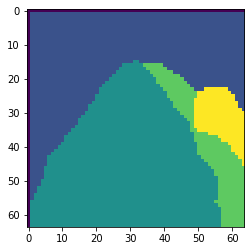

In [25]:
import time
tong1 = time.time()
out = model.predict_segmentation(
    inp="dataset_p9AL/images_prepped_test1000\\imageOP411.jpg",
)
tong2 = time.time()
import matplotlib.pyplot as plt
plt.imshow(out)
print(1/(tong2 - tong1))

In [87]:
out.shape

(64, 64)

In [30]:
from keras_segmentation.predict import predict,model_from_checkpoint_path

In [33]:
modeltong = model_from_checkpoint_path('output\\tongtest.h5')

loaded weights  output\tongtest.h5.4


In [10]:
import time
tong1 = time.time()
out = modeltong.predict_segmentation(
    inp="dataset_p9AL/images_prepped_test1000\\image9949.jpg",
)
tong2 = time.time()

import matplotlib.pyplot as plt
plt.imshow(out)
print(1/(tong2 - tong1))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-2859665189a5>", line 3, in <module>
    out = modeltong.predict_segmentation(
NameError: name 'modeltong' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Use

NameError: name 'modeltong' is not defined

In [19]:
def find_target_point(imag_1234):
    xxxcccv =0 
    xxxcccv_b =0 
    px_x = 0
    y_pol =0
    path_geny = np.zeros((12,2))
    for i in range(12) :
        px_x = 0
        prx = imag_1234[y_pol:y_pol+1][0:64]
        for c in range(len(prx[0])) :
            xxxcccv = prx[0][c]
            if xxxcccv == 4 and xxxcccv_b == 3 :
                px_x = c
            xxxcccv_b = xxxcccv
        
        if px_x != 0 :
            _pts = np.float32([[[px_x*2.5, y_pol*1.875]]])
            _dst = cv2.perspectiveTransform(_pts, perspective_M)
            _dst = _dst[0][0]

            path_geny[i][0] =_dst[0]
            path_geny[i][1] =_dst[1]
        else :
            path_geny[i][0] =0
            path_geny[i][1] =0
        y_pol = y_pol+5
    return  path_geny 

# tong555  = find_target_point(pr)
# import matplotlib.pyplot as plt
# plt.imshow(prx)
# print(tong555.astype('int'))  

In [27]:
x = 1.234567
y = "{:0.2f}".format(x)
y

'1.23'